# QHyper

opisac z ktorego wzoru korzystalismy - unbalanced penalization

In [1]:
hyper_params = {'cost_function_weight': 1, # weight for: cost function
               'deadline_linear_form_weight': 2, # weight for: deadline constraint - linear form (-- this is from the unbalanced penalization approach)
                'deadline_quadratic_form_weight': 2} # weight for: deadline constraint - quadratic form

tasks_file =  "workflows_data/workflows/3_tasks_1_path.json"
machines_file = "workflows_data/machines/4_machines.json"
deadline = 13

In [2]:
import numpy as np
params_config = {
        'angles': [[1.9482, 4.2254, 4.1086, 5.7801, 4.1416, 3.8738],
                   [0.9043, 2.5178, 1.7931, 2.4655, 1.3755, 1.0457]], # QAOA angles - first we have gammas (for the cost Hamiltonian), then we have betas (for the mixer)
        'hyper_args': [hyper_params['cost_function_weight'],
                       hyper_params['deadline_linear_form_weight'],
                       hyper_params['deadline_quadratic_form_weight']
                       ],
    }


In [3]:
from QHyper.solvers import VQA, solver_from_config

solver_config = {
    "solver": {
        "type": "vqa",
        "pqc": {
            "type": "qml_qaoa",
            "layers": 6,
            "optimizer": "qng",
            "optimizer_args": {
                "stepsize": 0.00045,
                "steps": 50,
                "verbose": True,
            },
            "backend": "default.qubit",
        },
        "params_inits": params_config
    },
    "problem": {
        "type": "workflow_scheduling",
        "encoding": "binary",
        "tasks_file": tasks_file,
        "machines_file": machines_file,
        "deadline": deadline,
    }
}

vqa = solver_from_config(solver_config)


In [4]:
solver_results = vqa.solve()


Step 1/5: 395.1869821406809
Step 2/5: 306.0307396542473
Step 3/5: 273.5168936669108
Step 4/5: 260.5940565735004
Step 5/5: 254.2303367772227


In [5]:
print(f"Best params: {solver_results.params}")


Best params: {'angles': tensor([[1.94830641, 4.22569353, 4.10850683, 5.78035342, 4.14177545,
         3.87375865],
        [0.92337163, 2.59962038, 1.70456512, 2.46701915, 1.28996485,
         1.03227991]], requires_grad=True), 'hyper_args': tensor([1, 2, 2], requires_grad=True)}


In [6]:
from QHyper.util import (
    weighted_avg_evaluation, sort_solver_results, add_evaluation_to_results)

# Evaluate results with weighted average evaluation
print("Evaluation:")
print(weighted_avg_evaluation(
    solver_results.probabilities, vqa.problem.get_score,
    penalty=0, limit_results=20, normalize=True
))
print("Sort results:")
sorted_results = sort_solver_results(
    solver_results.probabilities, limit_results=20)

# Add evaluation to results
results_with_evaluation = add_evaluation_to_results(
    sorted_results, vqa.problem.get_score, penalty=0)

for result, (probability, evaluation) in results_with_evaluation.items():
    print(f"Result: {result}, "
          f"Prob: {probability:.5}, "
          f"Evaluation: {evaluation}")


Evaluation:
14.7207946405549
Sort results:
Result: 000001, Prob: 0.2447, Evaluation: 25.0
Result: 100001, Prob: 0.063256, Evaluation: 27.0
Result: 110101, Prob: 0.058891, Evaluation: 0
Result: 100110, Prob: 0.036812, Evaluation: 28.0
Result: 010100, Prob: 0.035484, Evaluation: 0
Result: 010001, Prob: 0.034757, Evaluation: 27.0
Result: 011000, Prob: 0.033965, Evaluation: 0
Result: 000010, Prob: 0.032409, Evaluation: 0
Result: 011010, Prob: 0.031455, Evaluation: 28.0
Result: 000101, Prob: 0.031388, Evaluation: 26.0
Result: 111010, Prob: 0.027741, Evaluation: 0
Result: 011101, Prob: 0.022341, Evaluation: 0
Result: 111101, Prob: 0.022094, Evaluation: 0
Result: 111001, Prob: 0.019801, Evaluation: 0
Result: 011111, Prob: 0.017698, Evaluation: 0
Result: 100111, Prob: 0.0163, Evaluation: 0
Result: 110010, Prob: 0.013515, Evaluation: 0
Result: 001010, Prob: 0.012745, Evaluation: 0
Result: 111000, Prob: 0.012702, Evaluation: 0
Result: 000111, Prob: 0.012566, Evaluation: 0


<AxesSubplot: xlabel='index', ylabel='value'>

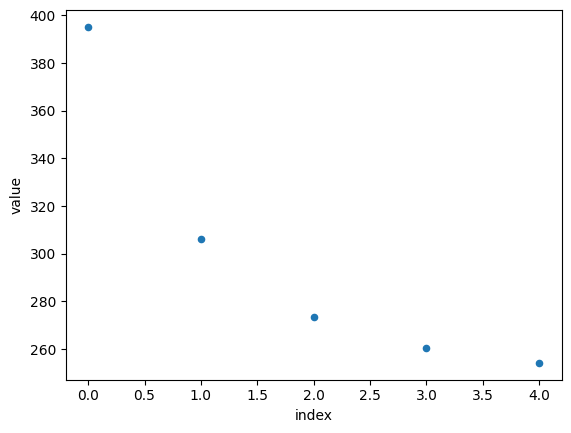

In [7]:
import pandas as pd

pd.DataFrame(solver_results.history[0]).reset_index().plot(x='index',y='value', kind='scatter')

In [8]:
tasks_file =  "workflows_data/workflows/srasearch_22_tasks.json"
machines_file = "workflows_data/machines/cyfronet.json"
deadline = 492081827

In [9]:
solver_config = {
    "solver": {
        "type": "cqm",
        "time": 10,
    },
    "problem": {
        "type": "workflow_scheduling",
        "encoding": "one-hot",
        "tasks_file": tasks_file,
        "machines_file": machines_file,
        "deadline": deadline,
    }
}

cqm = solver_from_config(solver_config)


In [10]:
result = cqm.solve()

In [11]:
cqm.problem.decode_solution(result)

{'bowtie2-build_ID0000001': 'AresGpu',
 'bowtie2_ID0000021': 'AresGpu',
 'merge_ID0000022': 'AresGpu',
 'bowtie2_ID0000003': 'AresGpu',
 'fasterq-dump_ID0000004': 'AresGpu',
 'bowtie2_ID0000005': 'AresGpu',
 'fasterq-dump_ID0000006': 'AresGpu',
 'bowtie2_ID0000007': 'AresGpu',
 'fasterq-dump_ID0000008': 'AresGpu',
 'bowtie2_ID0000009': 'AresGpu',
 'fasterq-dump_ID0000010': 'AresGpu',
 'bowtie2_ID0000011': 'AresGpu',
 'fasterq-dump_ID0000012': 'AresGpu',
 'fasterq-dump_ID0000002': 'AresGpu',
 'bowtie2_ID0000013': 'AresGpu',
 'fasterq-dump_ID0000014': 'AresGpu',
 'bowtie2_ID0000015': 'AresGpu',
 'fasterq-dump_ID0000016': 'AresGpu',
 'bowtie2_ID0000017': 'AresGpu',
 'fasterq-dump_ID0000018': 'AresGpu',
 'bowtie2_ID0000019': 'AresGpu',
 'fasterq-dump_ID0000020': 'AresGpu'}